
--- 1. Descriptive Statistics ---

Sales Data:
count     5.000000
mean     19.488000
std      13.884541
min       5.000000
25%      10.500000
50%      15.990000
75%      25.750000
max      40.200000
Name: SalesAmount, dtype: float64
Mean Sales: 19.49
Median Sales: 15.99
Mode Sales: [5.0, 10.5, 15.99, 25.75, 40.2]

Customer Age Data:
count     6.000000
mean     30.000000
std       6.324555
min      25.000000
25%      25.000000
50%      27.500000
75%      33.750000
max      40.000000
Name: Age, dtype: float64
Mean Age: 30.00
Median Age: 27.5
Mode Age: [25]

Website Visit Data:
count      7.000000
mean     191.428571
std       21.930627
min      150.000000
25%      185.000000
50%      200.000000
75%      200.000000
max      220.000000
Name: Visits, dtype: float64
Mean Visits: 191.43
Median Visits: 200.0
Mode Visits: [200]

--- 2. Distribution Analysis ---


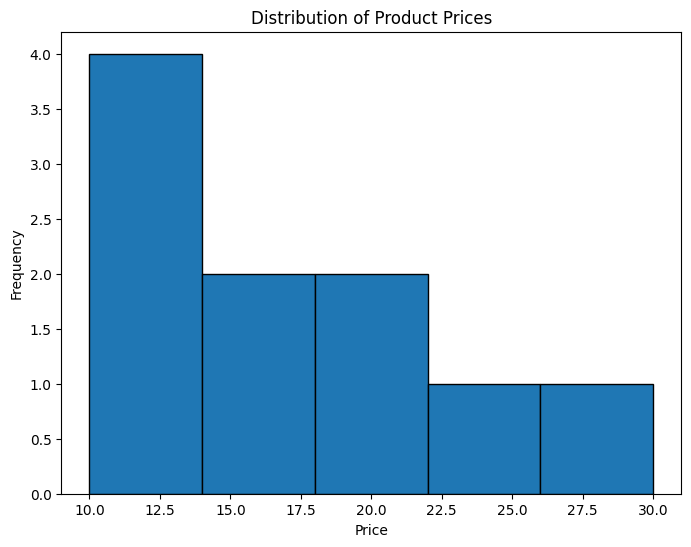

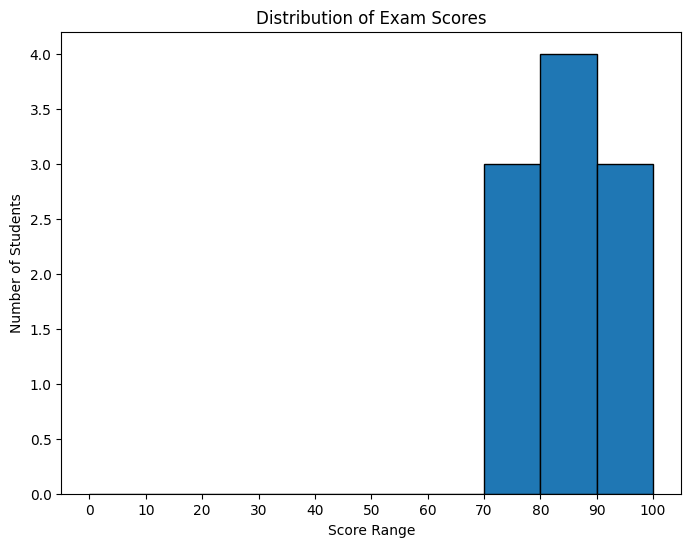

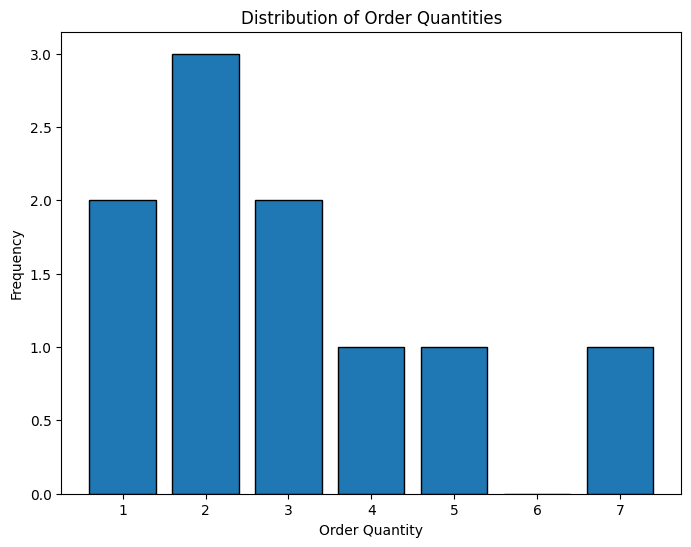


--- 3. Data Type Validation ---

Numeric Field Validation:
Non-numeric values found in 'Value' column:
   ID Value
2   3   abc

Date Format Validation (YYYY-MM-DD):
Dates not in YYYY-MM-DD format:
Index: 1, Date: 11/15/2023
Index: 2, Date: 2023-Dec-01

Email Format Validation (basic @ check):
Invalid email formats found:
    Name    Email
1    Bob  bob.com
3  David    david


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data in pandas DataFrames

# 1. Descriptive Statistics:
print("\n--- 1. Descriptive Statistics ---")

# Task 1: Sales figures in a retail dataset
sales_data = {'TransactionID': [1, 2, 3, 4, 5],
              'SalesAmount': [10.50, 25.75, 5.00, 40.20, 15.99]}
sales_df = pd.DataFrame(sales_data)
print("\nSales Data:")
print(sales_df['SalesAmount'].describe())
print(f"Mean Sales: {sales_df['SalesAmount'].mean():.2f}")
print(f"Median Sales: {sales_df['SalesAmount'].median():.2f}")
print(f"Mode Sales: {sales_df['SalesAmount'].mode().tolist()}")

# Task 2: Customer demographic dataset (Age)
customer_data = {'CustomerID': [101, 102, 103, 104, 105, 106],
                 'Age': [25, 30, 25, 40, 35, 25]}
customer_df = pd.DataFrame(customer_data)
print("\nCustomer Age Data:")
print(customer_df['Age'].describe())
print(f"Mean Age: {customer_df['Age'].mean():.2f}")
print(f"Median Age: {customer_df['Age'].median()}")
print(f"Mode Age: {customer_df['Age'].mode().tolist()}")

# Task 3: Daily website visit counts
visits_data = {'Day': [1, 2, 3, 4, 5, 6, 7],
               'Visits': [150, 200, 180, 200, 220, 200, 190]}
visits_df = pd.DataFrame(visits_data)
print("\nWebsite Visit Data:")
print(visits_df['Visits'].describe())
print(f"Mean Visits: {visits_df['Visits'].mean():.2f}")
print(f"Median Visits: {visits_df['Visits'].median()}")
print(f"Mode Visits: {visits_df['Visits'].mode().tolist()}")

# 2. Distribution Analysis:
print("\n--- 2. Distribution Analysis ---")

# Task 1: Distribution of product prices
price_data = {'ProductID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'Price': [10.00, 12.50, 15.00, 10.00, 20.00, 25.00, 15.00, 18.00, 12.50, 30.00]}
price_df = pd.DataFrame(price_data)
plt.figure(figsize=(8, 6))
plt.hist(price_df['Price'], bins=5, edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Task 2: Distribution of exam scores
score_data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'Score': [75, 82, 90, 78, 85, 92, 80, 76, 88, 95]}
score_df = pd.DataFrame(score_data)
plt.figure(figsize=(8, 6))
plt.hist(score_df['Score'], bins=range(0, 101, 10), edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Score Range')
plt.ylabel('Number of Students')
plt.xticks(range(0, 101, 10))
plt.show()

# Task 3: Distribution of order quantities
quantity_data = {'OrderID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'Quantity': [2, 5, 1, 3, 2, 7, 2, 4, 1, 3]}
quantity_df = pd.DataFrame(quantity_data)
plt.figure(figsize=(8, 6))
plt.hist(quantity_df['Quantity'], bins=range(min(quantity_df['Quantity']), max(quantity_df['Quantity']) + 2), edgecolor='black', align='left', rwidth=0.8)
plt.title('Distribution of Order Quantities')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.xticks(range(min(quantity_df['Quantity']), max(quantity_df['Quantity']) + 1))
plt.show()

# 3. Data Type Validation:
print("\n--- 3. Data Type Validation ---")

# Task 1: Validate numeric fields
numeric_check_data = {'ID': [1, 2, 3, 4, 5],
                      'Value': ['10', '25.5', 'abc', '40', '50.0']}
numeric_check_df = pd.DataFrame(numeric_check_data)
print("\nNumeric Field Validation:")
non_numeric = numeric_check_df[pd.to_numeric(numeric_check_df['Value'], errors='coerce').isna()]
if not non_numeric.empty:
    print("Non-numeric values found in 'Value' column:")
    print(non_numeric)
else:
    print("All values in 'Value' column appear to be numeric.")

# Task 2: Check for valid date formats
date_check_data = {'Event': ['A', 'B', 'C', 'D'],
                   'Date': ['2023-10-26', '11/15/2023', '2023-Dec-01', '2024-01-05']}
date_check_df = pd.DataFrame(date_check_data)
print("\nDate Format Validation (YYYY-MM-DD):")
valid_date_format = '%Y-%m-%d'
invalid_dates = []
for index, row in date_check_df.iterrows():
    try:
        pd.to_datetime(row['Date'], format=valid_date_format, errors='raise')
    except ValueError:
        invalid_dates.append((index, row['Date']))

if invalid_dates:
    print("Dates not in YYYY-MM-DD format:")
    for index, date_str in invalid_dates:
        print(f"Index: {index}, Date: {date_str}")
else:
    print("All dates appear to be in YYYY-MM-DD format.")

# Task 3: Validate email formats (basic check)
email_check_data = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
                    'Email': ['alice@example.com', 'bob.com', 'charlie@sub.example.net', 'david']}
email_check_df = pd.DataFrame(email_check_data)
print("\nEmail Format Validation (basic @ check):")
invalid_emails = email_check_df[~email_check_df['Email'].str.contains('@')]
if not invalid_emails.empty:
    print("Invalid email formats found:")
    print(invalid_emails)
else:
    print("All emails appear to have a basic valid format (containing '@').")